# U-Net++
## Training U-Net++

In [1]:
%load_ext autoreload

In [2]:
autoreload 2

In [3]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

In [4]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

In [5]:
from helper.models.config import *
from helper.models.unet import *
from helper.data.dataobj import DrainageDataset
from torch.utils.data import DataLoader
from helper.data.dataobj import DrainageDataset
from sklearn.model_selection import train_test_split
from helper.utilities import *
from helper.callbacks.logs import save_history_callback, save_resulting_callback
from helper.callbacks.visualize import *
from transformers import logging
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
logging.set_verbosity_error()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Setting model

In [6]:
device = 'cuda'
unet_model_pp = UNet(type='Plusplus')

Initialized Unet++


In [7]:
config_unet_pp = Config(
    model=unet_model_pp,
    num_epochs=200,
    lr=1e-4,
    scheduler=True,
    batch_size=128
)
print(config_unet_pp.get_params())

{'num_epochs': 200, 'batch_size': 128, 'opt': 'Adam', 'crit': 'CrossEntropy', 'learning_rate': 0.0001, 'scheduler': 'ReduceLROnPlateau'}


## Dataset

In [8]:
images = np.load('../helper/data/datasets/new_images.npy').astype(np.uint8)
masks = np.load('../helper/data/datasets/new_masks.npy')

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

print('Getting test dataset')
bins = [get_bin(mask) for mask in masks]

train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=test_ratio, stratify=bins, random_state=42)

print('Getting train and val datasets')
bins = [get_bin(mask) for mask in test_masks]
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=val_ratio / (train_ratio + test_ratio), random_state=42)

train_dataset = DrainageDataset(train_images, train_masks, device=device)
val_dataset = DrainageDataset(val_images, val_masks, device=device)
test_dataset = DrainageDataset(test_images, test_masks, device=device)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

drainage_dataloader = {'train': train_dataloader, 'validate': val_dataloader}

Getting test dataset
Getting train and val datasets


## Training and testing model

### Training model

Training model Unet++ - 1 using cuda


''

epoch:   0%|          | 0/200 [13:04<?, ?it/s]


KeyboardInterrupt: 

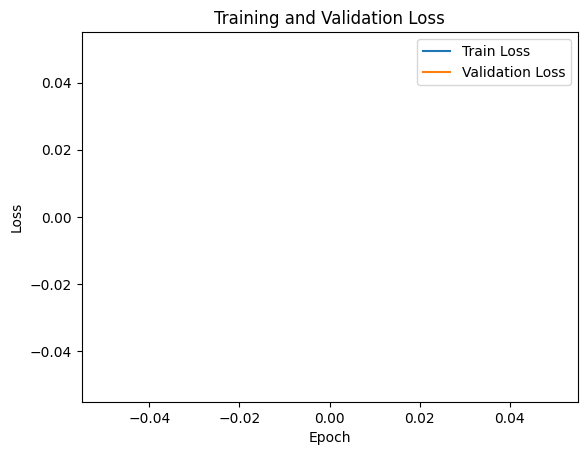

: 

In [ ]:
history = unet_model_pp.train(drainage_dataloader, config_unet_pp, device)

### Saving training callbacks

In [ ]:
unet_model_pp.save()
print('Saved model')
save_history_callback(unet_model_pp, history=history, hyperparams=config_unet_pp.get_params())
print('Saved train history')

Saved model
Saved train history
